In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
df =pd.read_csv('Travel.csv')
df


,Timestamp,Are you from Jaipur?,What is your age?,What is your gender?,What is your departure address (with pincode)?,What is your destination address? (with pincode),What is your mode of transportation?,"If Public Transport, Do you get seat availability easily?",If personal vehicles do you find a parking space easily?,How long do you wait for Public Transport?,...,What type of stoppage?,How many traffic lights do you have to pass during your travel journey ?,How many junctions during your travel journey?,How many road blocks during your travel journey?,Can you reach your destination on Time?,Can you reach your home on Time?,What is the weather condition before leaving home?,When did this journey take place?,When did you travel?,"Describe how do you feel traveling in Jaipur, in one or two words. For example polluted, good, sad etc."
0,2024/12/31 9:56:27 am GMT+5:30,Yes,20-29,Male,"2/627, Sector 2, Malviya Nagar, Jaipur, Rajast...","BISR, Statue Circle, C Scheme, Jaipur, Rajasth...",Public Transport,No,No,31-60 Minutes,...,Traffic Light,6,0,0,Yes,No,Sunny,Working Day,Weekday,Chaotic
1,2024/12/31 12:35:40 pm GMT+5:30,Yes,19 and below,Female,Flat no 201 Vatsalya Enclave Ganesh Nagar Iskc...,Birla Institute of Technology Jaipur Near Apex...,Cabs Services,NaN,NaN,NaN,...,Traffic Light,5,0,0,Yes,Yes,Cloudy,Working Day,Weekday,Mesmerized!
2,2024/12/31 12:54:10 pm GMT+5:30,Yes,19 and below,Male,"Swastik Villas, New Sanganer Road, Jaipur(302020)","Bit Jaipur, Malviya Nagar, Jaipur(302017)",Two Wheeler,No,Yes,31-60 Minutes,...,Traffic Light,4,5,2,Yes,No,Cloudy,Working Day,Weekday,Polluted
3,2024/12/31 2:49:46 pm GMT+5:30,Yes,19 and below,Male,305001,302017,Public Transport,Yes,Yes,0-30 Minutes,...,NaN,1,0,0,Yes,Yes,Sunny,Working Day,Weekday,NaN
4,2024/12/31 2:57:22 pm GMT+5:30,Yes,19 and below,Male,24/25 sagar apartments,Same,Two Wheeler,No,Yes,0-30 Minutes,...,Traffic Light,6,NaN,NaN,No,NaN,Sunny,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,2025/01/20 11:58:51 am GMT+5:30,Yes,19 and below,Male,Mansarovar (302020),Lok Kalyan Marg (110011),Public Transport,Yes,No,0-30 Minutes,...,-,3,0,0,Yes,Yes,Sunny,Working Day,Weekday,Good
920,2025/01/20 11:59:10 am GMT+5:30,Yes,20-29,Male,"Dlb Rise apartment , Ganesh nagar , Mansarovar...","127 VHE Vivekanand nagar Kota , 324010",Two Wheeler,Yes,Yes,0-30 Minutes,...,Traffic Light,2,0,0,Yes,Yes,Sunny,Holiday,Weekday,Good
921,2025/01/20 12:07:40 pm GMT+5:30,Yes,20-29,Female,Mansarover 302020,vaishali,Cabs Services,No,No,0-30 Minutes,...,Traffic Light,3,0,2,Yes,No,Cloudy,Working Day,Weekday,So much traffic
922,2025/01/20 12:07:49 pm GMT+5:30,No,20-29,Male,Mansarovar 302020,Raja park 302004,Two Wheeler,Yes,Yes,0-30 Minutes,...,Traffic Light,5 or 6,0,0,Yes,Yes,Sunny,Holiday,Weekend,Hhud


<Axes: >

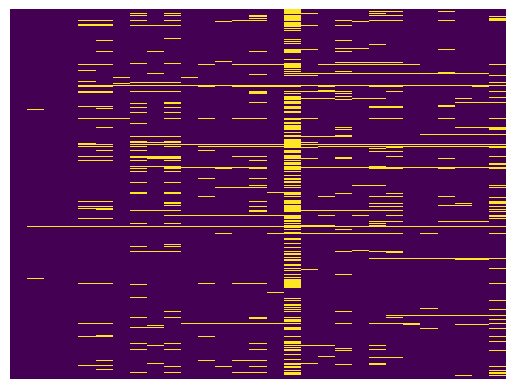

In [2]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis',xticklabels=False)

In [6]:
unique_cost_petrol=df['Cost of petrol'].unique()

In [7]:
unique_cost_petrol

array(['Rs. 70', '₹250', 'Rs25', '10', '110', 'Nothing ', nan, '120-180',
       '20-25min', '150 per day', '140 rupees ', '200', '0 rs', '130',
       '60 min', '120 rupees', '400', '80 Rupees ', 'Per month ₹ 1200',
       '60rs', '50', '20', '109Rs.', '3000', '445', 'Rs 160 to 350 ',
       '100', '220', '200-300',
       'By public transport ( approx Rs.450 per day ) and by two- wheelers( approx Rs. 450 per week )',
       '0 Rupees ', '130-160', '20 minutes ', '150 Rupees ', '120',
       '30-40', '50-60rs/day', 'Rs. 200-250 from own vehicle ', '60',
       '100 rupees', '15', '500', '1000 rs', '5000', 'No cost', '₹ 80',
       'Around 100 Rs', '100/-', '800 rupees', '0', '50 rs', '100 rs',
       '30-35 minutes ', '90 Rupees', '90', '30', '120-150 rs',
       'Vaisali nagar ', '60 rs', '300/- per day ', '50rs', '60 rupess',
       '₹80/day', '150/day', '60 Rs', '230', '50-80 ', '100 Rs.', '2000',
       '500 rs', '400 rupees ', '0, Electric Vehicle', '600', '200 rs',
       'Appro

In [8]:
len(unique_cost_petrol)

379

<Axes: xlabel='Cost of petrol', ylabel='What is your gender?'>

C:\Users\bhara\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\bhara\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128557 (\N{LOUDLY CRYING FACE}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\bhara\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bhara\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128557 (\N{LOUDLY CRYING FACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


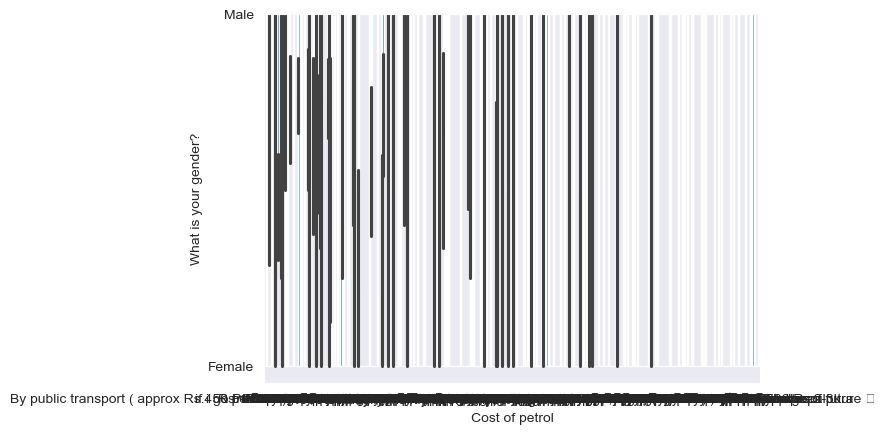

In [12]:
sns.barplot(df,x='Cost of petrol',y='What is your gender?')

<Axes: xlabel='count', ylabel='What is your gender?'>

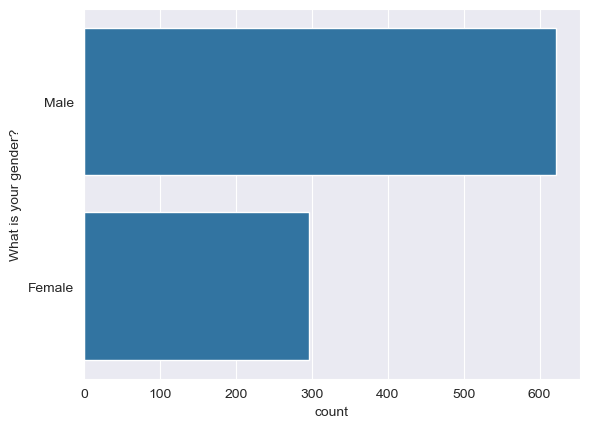

In [14]:
sns.countplot(df['What is your gender?'])

In [15]:
df['Cost of petrol'] = pd.to_numeric(df['Cost of petrol'].str.extract(r'(\d+\.?\d*)')[0], errors='coerce')

In [20]:
df['Cost of petrol']

919      NaN
920    400.0
921    300.0
922    150.0
923    200.0
Name: Cost of petrol, dtype: float64

In [21]:
df['Cost of petrol'].describe()

count       799.000000
mean       1636.515907
std       12011.361902
min           0.000000
25%          50.000000
50%         100.000000
75%         250.000000
max      250000.000000
Name: Cost of petrol, dtype: float64

In [23]:
df['Cost of petrol'].fillna(df['Cost of petrol'].median(), inplace=True)

In [24]:
df['Cost of petrol'].describe()

count       924.000000
mean       1428.653907
std       11180.819234
min           0.000000
25%          60.000000
50%         100.000000
75%         200.000000
max      250000.000000
Name: Cost of petrol, dtype: float64

In [25]:
df['Cost of petrol']

0

In [26]:
df['What time do you prefer to leave your work/school/university/ hospital for home?'].unique()

array(['4PM-5PM', '5PM-6PM', '3PM-4PM', '6PM-7PM', '8PM-9PM', nan,
       '9PM-10PM', '7PM-8PM', '10PM-11PM', '11PM-12PM'], dtype=object)